## Deteksi Komentar Spam

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [188]:
data = pd.read_csv("Youtube01-Psy.csv")
print(data.head())

                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1  


In [189]:
print(data.isnull().sum())

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64


In [190]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB
None


In [191]:
data = data[["CONTENT", "CLASS"]]
print(data.sample(5))

                                               CONTENT  CLASS
143  Add me here...https://www.facebook.com/TLouXmu...      1
93   Does anyone here use gift cards like Amazon, i...      1
175  https://www.change.org/p/facebook-twitter-yout...      1
134                              ❤️ ❤️ ❤️ ❤️ ❤️❤️❤️❤️﻿      0
286  Enough with the whole "how does this have two ...      0


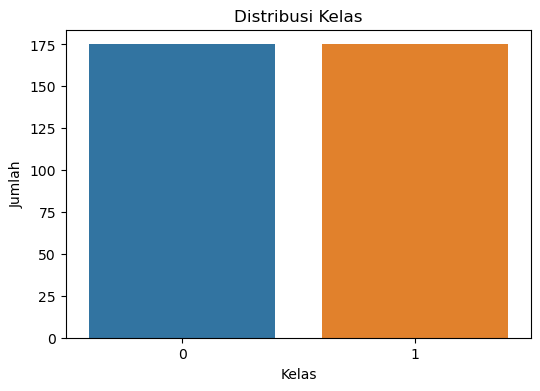

In [192]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CLASS', data=data)
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

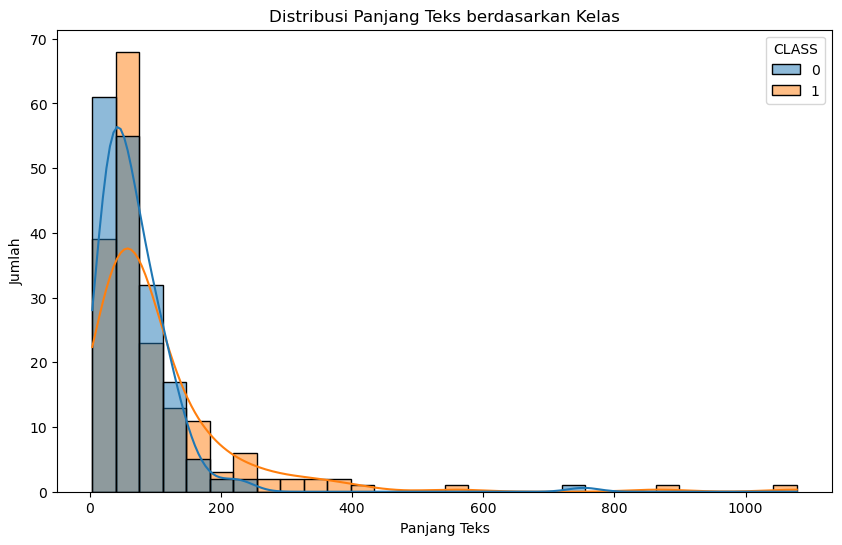

In [193]:
data['CONTENT_LENGTH'] = data['CONTENT'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='CONTENT_LENGTH', hue='CLASS', bins=30, kde=True)
plt.title('Distribusi Panjang Teks berdasarkan Kelas')
plt.xlabel('Panjang Teks')
plt.ylabel('Jumlah')
plt.show()

In [194]:
data["CLASS"] = data["CLASS"].map({0: "Bukan Spam",
                                   1: "Ini Adalah Spam"})
print(data.sample(5))

                                               CONTENT            CLASS  \
79   Hi there~I'm group leader of Angel, a rookie K...  Ini Adalah Spam   
236                             this comment is wrong﻿       Bukan Spam   
146            Get free gift cards and pay pal money!﻿  Ini Adalah Spam   
284  1 million dislikes!EPIC FAIL(ready for you fan...       Bukan Spam   
8      You should check my channel for Funny VIDEOS!!﻿  Ini Adalah Spam   

     CONTENT_LENGTH  
79              556  
236              22  
146              39  
284              52  
8                47  


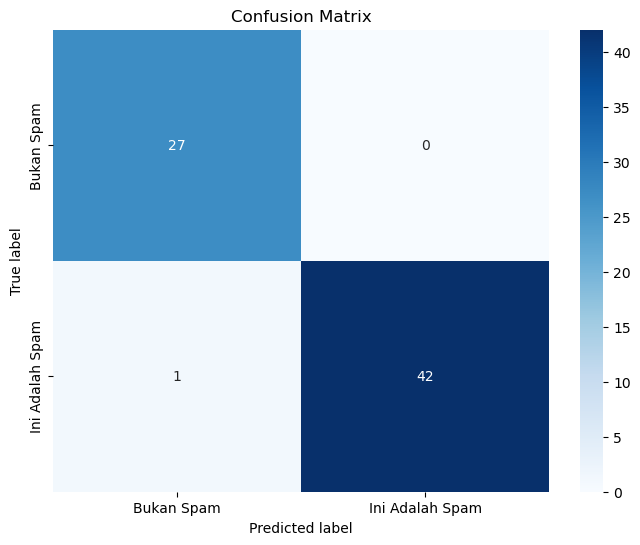

In [195]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Bukan Spam", "Ini Adalah Spam"],
            yticklabels=["Bukan Spam", "Ini Adalah Spam"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [196]:
x = np.array(data["CONTENT"])
y = np.array(data["CLASS"])

cv = CountVectorizer()
x = cv.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

model = BernoulliNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9857142857142858


In [197]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'binarize': [None, 0.0, 0.1, 0.5]
}

grid_search = GridSearchCV(BernoulliNB(), param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

print("Parameter terbaik:", grid_search.best_params_)
print("Skor validasi terbaik:", grid_search.best_score_)


Parameter terbaik: {'alpha': 0.1, 'binarize': 0.0}
Skor validasi terbaik: 0.95


In [198]:
from sklearn.metrics import classification_report

ypred = model.predict(xtest)
print(classification_report(ytest, ypred))

                 precision    recall  f1-score   support

     Bukan Spam       0.96      1.00      0.98        27
Ini Adalah Spam       1.00      0.98      0.99        43

       accuracy                           0.99        70
      macro avg       0.98      0.99      0.99        70
   weighted avg       0.99      0.99      0.99        70



In [199]:
sample = "Check this out: https://thecleverprogrammer.com/" 
data = cv.transform([sample]).toarray()
print(model.predict(data))

['Ini Adalah Spam']


In [200]:
sample = "Lack of information!" 
data = cv.transform([sample]).toarray()
print(model.predict(data)) 

['Bukan Spam']
